## AICE - data-driven forecasts of sea ice concentration coherent with passive microwave products	
Can't seem to find any more information about this product. But it's cool. Available from Met Norway's Thredds Server [here](https://thredds.met.no/thredds/catalog/aice_files/catalog.html).

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import nctoolkit as nc
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import iris

nctoolkit is using Climate Data Operators version 2.2.2


In [3]:
ds = nc.open_thredds("https://thredds.met.no/thredds/dodsC/aice_files/AICE_forecasts_20250131T000000Z.nc")
ds

<nctoolkit.DataSet>:
Number of files: 1
File contents:
  variable  ntimes  npoints  nlevels              long_name unit data_type
0      SIC      10   261120        1  Sea ice concentration    %       F64

In [4]:
ice_concentration = ds.to_xarray(variables="SIC")
ice_concentration

<xarray.Dataset> Size: 25MB
Dimensions:                 (y: 480, x: 544, time: 10)
Coordinates:
    lon                     (y, x) float64 2MB ...
    lat                     (y, x) float64 2MB ...
  * x                       (x) float64 4kB -8.525e+05 -8.475e+05 ... 1.862e+06
  * y                       (y) float64 4kB 2.25e+04 1.75e+04 ... -2.372e+06
  * time                    (time) datetime64[ns] 80B 2025-01-31 ... 2025-02-09
Data variables:
    Lambert_Azimuthal_Grid  float64 8B ...
    SIC                     (time, y, x) float64 21MB ...
Attributes: (12/15)
    CDI:                  Climate Data Interface version 2.2.4 (https://mpime...
    Conventions:          CF-1.8, ACDD-1.3
    institution:          Norwegian Meteorological Institute
    title:                AICE sea ice concentration forecasts
    summary:              Short-range sea ice concentration forecasts produce...
    keywords:             Sea ice concentration forecasts, Deep learning, Eur...
    ...                   ...
    bulletin_type:        Forecast
    forecast_range:       10 days
    time_coverage_start:  2025-01-31T000000Z
    time_coverage_stop:   2025-02-10T000000Z
    history:              Wed Feb 05 15:22:25 2025: cdo -L -selname,SIC https...
    CDO:                  Climate Data Operators version 2.2.2 (https://mpime...

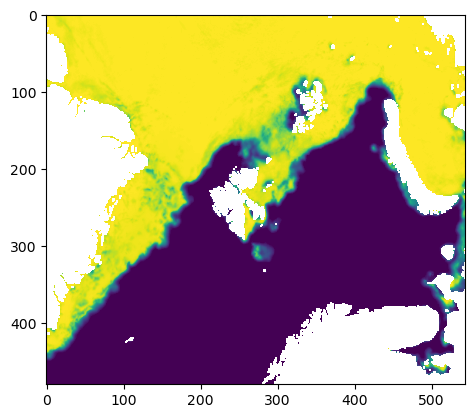

In [5]:
plt.imshow(ice_concentration.SIC.isel(time=0))
plt.show()

In [9]:
# animate 10 day rollout of SIC
# edge animation
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fps = 10
def update(step):
    im.set_data(ice_concentration.SIC.isel(time=step).to_numpy())
    title.set_text(f"Met Norway AICE\nInit 2025-01-31\nValid {ice_concentration.SIC.time[step].to_numpy()}")
im = ax.imshow(ice_concentration.SIC.isel(time=0).to_numpy(), vmin=0, vmax=100, animated=True)
title = plt.suptitle(f"Met Norway AICE\nInit 2025-01-31\nValid {ice_concentration.SIC.time[0].to_numpy()}")
plt.tight_layout()
animation = FuncAnimation(fig, update, range(len(ice_concentration.SIC.time)), interval=1000 / fps)
plt.close()
animation.save(f"icenet-experimental/aice/20250131.mp4", fps=fps)